<a href="https://colab.research.google.com/github/CarrenP/datamining/blob/main/Exercise_Week_3_Pandas_Exploration_carren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [153]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [154]:
#1

student = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv')
print(student.iloc[:, 0:5].head())

   application_id  gender  international   gpa       major
0               1  Female          False  3.30    Business
1               2    Male          False  3.28  Humanities
2               3  Female           True  3.30    Business
3               4    Male          False  3.47        STEM
4               5    Male          False  3.35        STEM


2. display the info column and conclude what the insight is from that column

In [155]:
#2
student.info()
#conclusion
# Terdapat 10 kolum yang ada pada dataset ini, dataset ini terdiri dari 1 boolean, 3 float64, 1 int64, dan 5 object.
# Kolum race, gmat, work_exp,work_industry,admission memiliki missing values. Total data yang dimiliki dataset ini adalah 6194.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [156]:
#3a
admission = student['admission']
print(admission.value_counts(dropna=False))

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [157]:
#3b
race = student['race']
print(race.value_counts(dropna=False))

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [158]:
#4
student['admission'].fillna('deny', inplace=True)
student['race'].fillna('other', inplace=True)

5. recheck missing value

In [159]:
#5
student.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [160]:
# 6
student.drop('application_id', axis=1, inplace=True)


7. show describe column and conclude what the insight is from that column

In [161]:
#7
student.describe()
#conclusion
# dari data dibawah kita bisa mengethaui bahwa rata-rata dari gpanya adalah 3.25,gmat 651.09, dan work_exp 5.01
# working experience yang dimiliki oleh pelajar di dataset ini adalah 5 tahun
# GPA tertinggi dari dataset ini adalah 3.77, gmat 780 , dna wokring experience terlama ada di angka 9
# Perhitunga ini diambil dari total 6194 data yang ada.

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

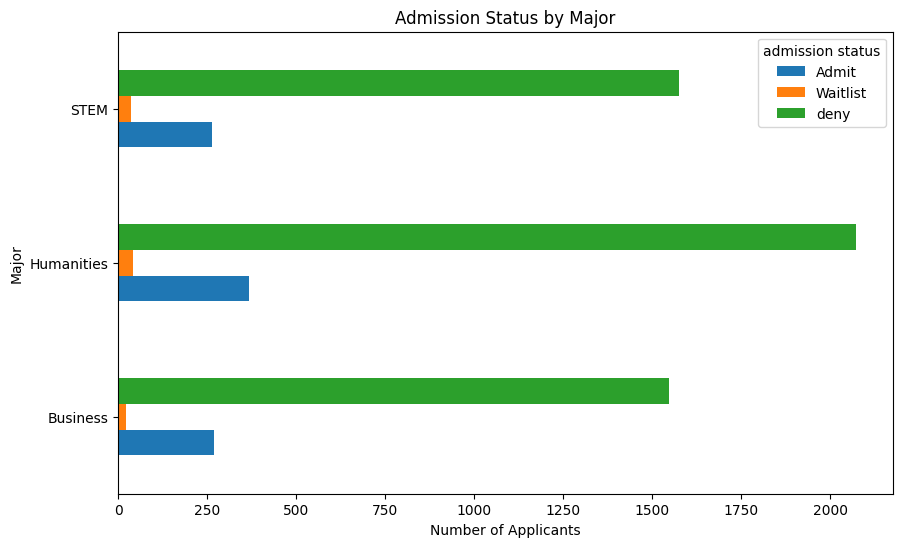

In [162]:
#8

count_admission = student.groupby(['major','admission'])['admission'].count().unstack()
count_admission.plot (kind='barh',figsize=(10,6))
plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='admission status')
plt.show()

# Conslusions
# berdasarkan visualisasi yang ada, secara general kebanyakan mahasiswa ditolak dengan jurusan humanities di tingkat penolakan tertinggi diikuti oleh business dan STEM.
# Humanities memiliki peringkat penerimaan tertinggi dibanding dengan STEM dan Business
#Jumlah waitlist di jurusan humanities lebih sedikit dibanding dengan 2 jurusan lainnya.

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

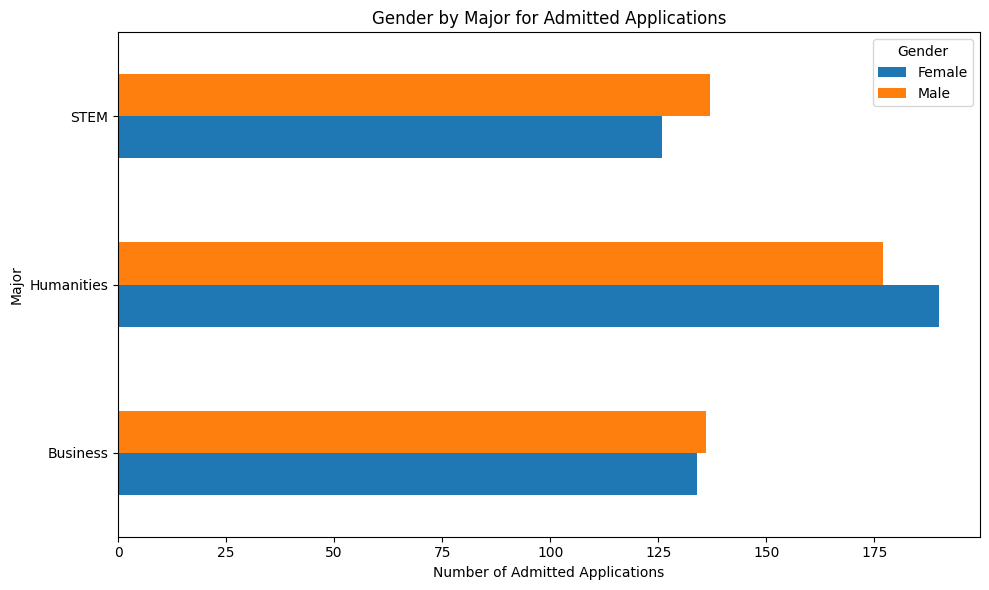

In [163]:
#9
admitted_student = student[student['admission'] == 'Admit']
count_admitted_gender_by_major = admitted_student.groupby(['major', 'gender'])['gender'].count().unstack()
count_admitted_gender_by_major.plot(kind='barh', figsize=(10, 6))
plt.title('Gender by Major for Admitted Applications')
plt.xlabel('Number of Admitted Applications')
plt.ylabel('Major')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Conclusions
# Jurusan Humanities memiliki lebih banyak mahasiswa perempuan
#Jurusan STEM memiliki lebih banyak jumlah mahasiswa pria
# Perbedaan jumlah mahasiswa pria dan wanita di jurusan business tidak terlalu berbeda jika dibandingkan dengan 2 jurusan lainnya.

10. create your own insightful visualization and explain it in at least 2 sentences

<ipython-input-164-28ce9b2a08e8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='gpa', data=student, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a 

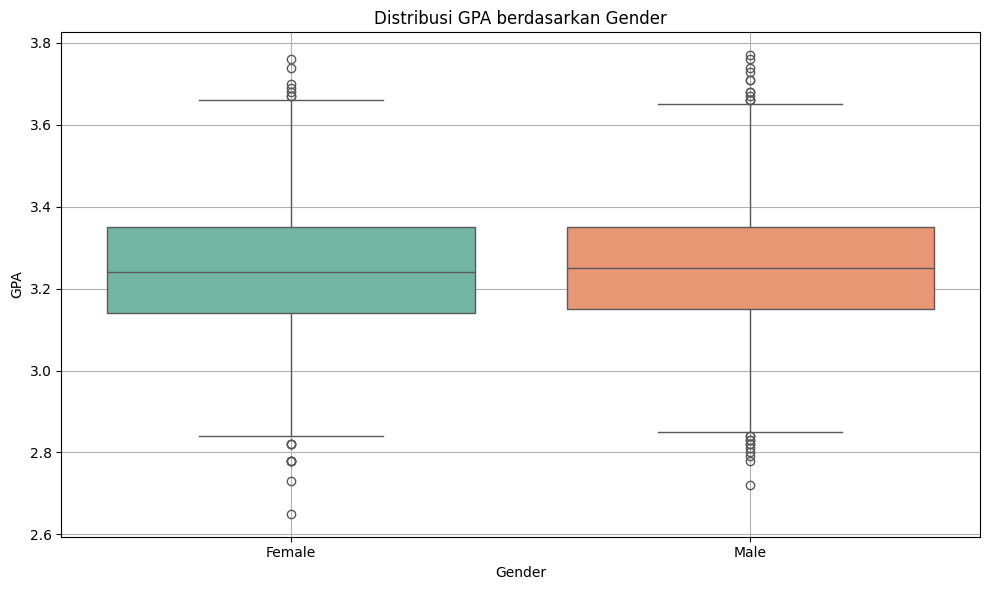

In [164]:
#10

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='gpa', data=student, palette='Set2')
plt.title('Distribusi GPA berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('GPA')
plt.grid(True)
plt.tight_layout()
plt.show()

#Conclusions
#Pada grafik ini, terlihat bahwa median GPA untuk wanita dan pria cukup berdekatan, dengan nilai sekitar 3.2
#Median GPA wanita dan pria hampir sama, tetapi rentang GPA untuk pria sedikit lebih lebar.
#Pria memiliki lebih banyak outliers di bagian atas (nilai GPA yang lebih tinggi)
#Distribusi GPA pada pria cenderung sedikit lebih terdistribusi ke atas, sedangkan pada wanita sedikit lebih banyak yang berada di sekitar median.



11. create your own insightful visualization and explain it in at least 2 sentences

<ipython-input-165-d3742ab17dd2>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=proportion_race_major_melted, x='major', y='proportion', hue='race', palette='Set2', ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a len

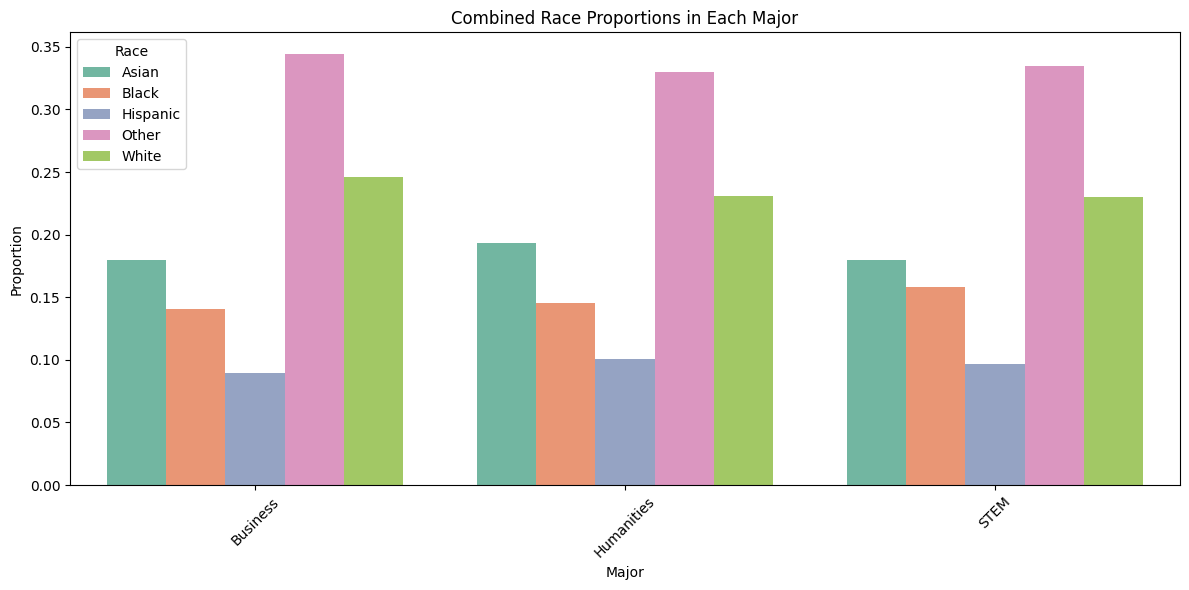

In [165]:
#11
student['race'] = student['race'].replace(['Other', 'other'], 'Other')

# Menghitung jumlah siswa berdasarkan jurusan dan ras
count_race_major = student.groupby(['major', 'race']).size().unstack(fill_value=0)

# Menghitung proporsi ras dalam setiap jurusan
proportion_race_major = count_race_major.div(count_race_major.sum(axis=1), axis=0)

# Mengubah proporsi menjadi format long untuk visualisasi
proportion_race_major.reset_index(inplace=True)
proportion_race_major_melted = proportion_race_major.melt(id_vars='major', var_name='race', value_name='proportion')

# Membuat diagram stacked bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=proportion_race_major_melted, x='major', y='proportion', hue='race', palette='Set2', ci=None)

# Menambahkan judul dan label sumbu
plt.title('Combined Race Proportions in Each Major')
plt.xlabel('Major')
plt.ylabel('Proportion')

# Mengatur legenda dengan judul "Race"
plt.legend(title='Race')

# Mengatur rotasi pada label jurusan
plt.xticks(rotation=45)

# Mengatur tata letak agar tidak ada elemen yang terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()
# Conclusion:
# Kategori "Other" (warna pink) memiliki proporsi tertinggi di semua jurusan, menunjukkan bahwa banyak mahasiswa yang mungkin tidak masuk ke dalam kategori ras yang lebih umum.
# Terdapat pola yang sama yang dapat dilihat, bahwa top 3 race dari semua jurusan yang ada selain other adalah white, asian dan black.

12. encode categorical columns and display the results

In [166]:
#12a
#encode X
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

student['gender'] = encoder.fit_transform(student['gender'])
student['international'] = encoder.fit_transform(student['international'])
student['major'] = encoder.fit_transform(student['major'])
student['race'] = encoder.fit_transform(student['race'])
student['work_exp'] = encoder.fit_transform(student['work_exp'])
student['work_industry'] = encoder.fit_transform(student['work_industry'])

student.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,Admit
1,1,0,3.28,1,1,680.0,4,6,deny
2,0,1,3.30,0,3,710.0,4,13,Admit
3,1,0,3.47,2,1,690.0,5,13,deny
4,1,0,3.35,2,2,590.0,4,1,deny


In [167]:
#12b
#encode y
student['admission'] = encoder.fit_transform(student['admission'])

student.head()


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,0
1,1,0,3.28,1,1,680.0,4,6,2
2,0,1,3.30,0,3,710.0,4,13,0
3,1,0,3.47,2,1,690.0,5,13,2
4,1,0,3.35,2,2,590.0,4,1,2


13. create a heatmap to see the correlation and explain the conclusion

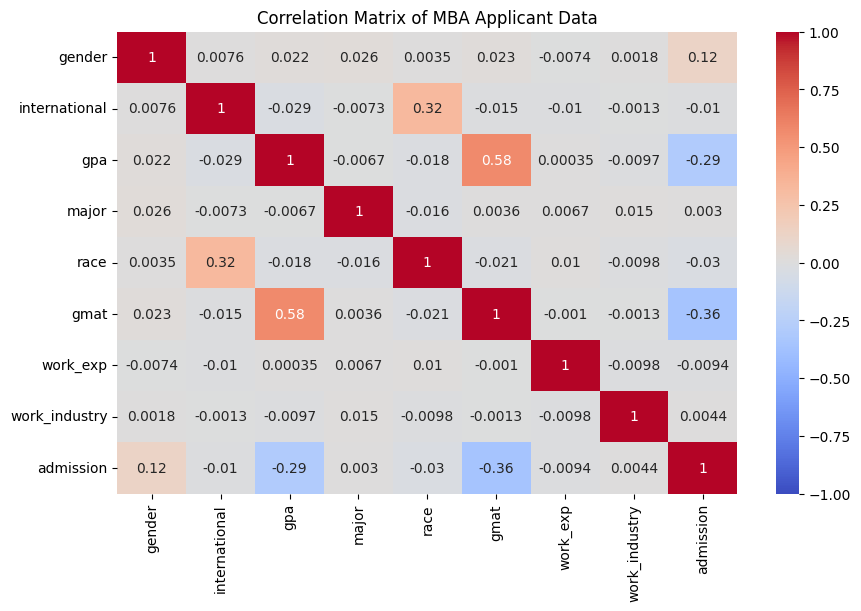

In [168]:
#13
import seaborn as sns
corr_matrix = student.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix of MBA Applicant Data')

plt.show()

#Conclusion
# GMAT dan GPA memiliki korelasi positif yang cukup tinggi (0.58), yang menunjukkan bahwa nilai GMAT yang lebih tinggi biasanya GPA juga lebih tinggi.
# GPA dan admission memiliki korelasi negatif (-0.29), yang berarti semakin tinggi GPA, semakin besar kemungkinan seseorang diterima.
# GMAT dan admission (penerimaan) memiliki korelasi negatif (-0.36) menunjukkan bahwa semakin tinggi nilai GMAT, semakin besar kemungkinan seseorang untuk diterima.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [171]:
#Challenge
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X = student[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry']]
y = student['admission']
label_encoder = LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

dtree = RandomForestClassifier(n_estimators=200, random_state=42)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

dataclasses = {
    'gender': 0, 'international': 1, 'gpa' : student['gpa'].mean(), 'major': 0, 'race' : 0, 'gmat' : 580, 'work_exp' : 2, 'work_industry': 3
}
df_lisa = pd.DataFrame([dataclasses])
predict = dtree.predict(df_lisa)
print("Predicted admission status (encoded): {}".format(predict))

admission = encoder.inverse_transform(predict)

print("The admission status of Lisa is:", admission[0])


Accuracy: 0.8305084745762712
Predicted admission status (encoded): [2]
The admission status of Lisa is: deny
